In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Define the URL of Hacker News
url = "https://news.ycombinator.com/"

# Fetch the page content
response = requests.get(url)
if response.status_code != 200:
    print("Failed to fetch data from Hacker News.")
    exit()

# Parse the content with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the stories on the page
stories = soup.find_all('tr', class_='athing')

# Lists to store scraped data
titles = []
scores = []
links = []
times = []

# Scrape information for each story
for story in stories:
    # Ensure that the title exists
    title_tag = story.find('a', class_='storylink')
    if title_tag:
        title = title_tag.text
    else:
        title = "No title"
    
    # Ensure that the score exists
    score_tag = story.find_next('span', class_='score')
    score_value = int(score_tag.text.split()[0]) if score_tag else 0

    # Ensure that the time exists
    time_tag = story.find_next('span', class_='age')
    time_value = time_tag.text if time_tag else 'Unknown'
    
    # Store the scraped data
    titles.append(title)
    scores.append(score_value)
    links.append(story.find('a', class_='storylink')['href'] if title_tag else 'No link')
    times.append(time_value)

# Convert the time strings to datetime objects (simplified for example)
time_deltas = []
for time_str in times:
    if "minute" in time_str:
        minutes = int(time_str.split()[0])
        time_deltas.append(datetime.datetime.now() - datetime.timedelta(minutes=minutes))
    elif "hour" in time_str:
        hours = int(time_str.split()[0])
        time_deltas.append(datetime.datetime.now() - datetime.timedelta(hours=hours))
    elif "day" in time_str:
        days = int(time_str.split()[0])
        time_deltas.append(datetime.datetime.now() - datetime.timedelta(days=days))
    else:
        time_deltas.append(datetime.datetime.now())

# Create a DataFrame for easier analysis
df = pd.DataFrame({
    'Title': titles,
    'Score': scores,
    'Time': time_deltas,
    'Link': links
})
df.to_csv('hacker_news_data.csv', index=False)
print("Data saved to 'hacker_news_data.csv'.")

Data saved to 'hacker_news_data.csv'.


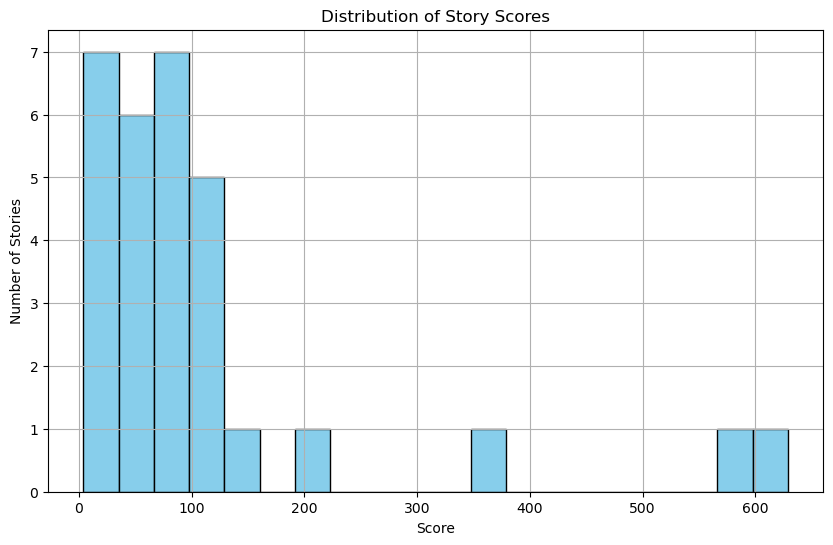

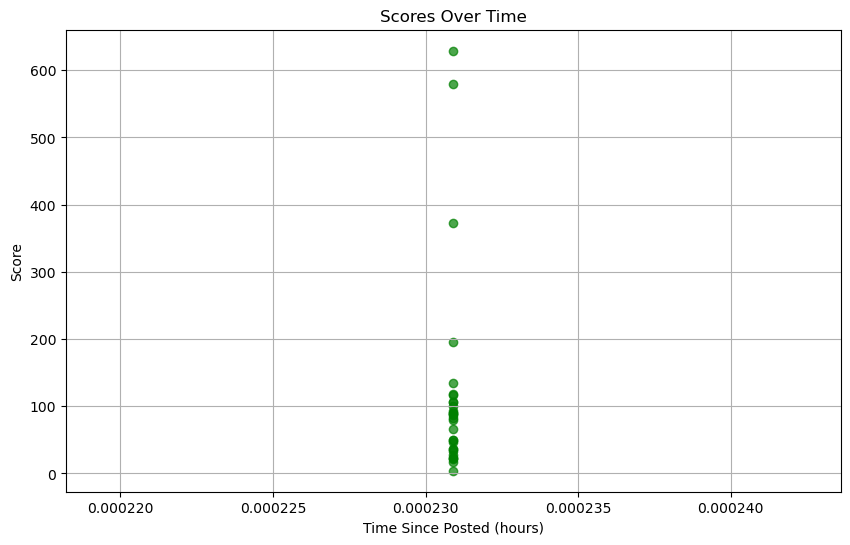

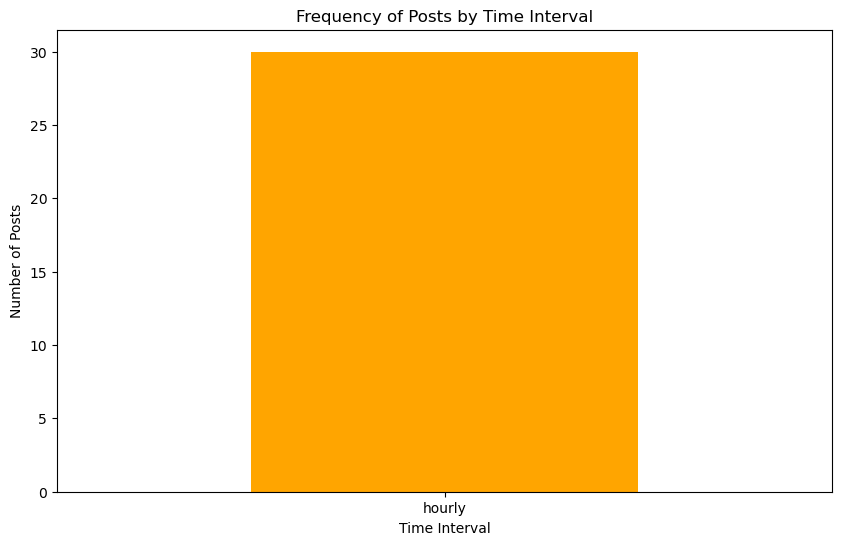

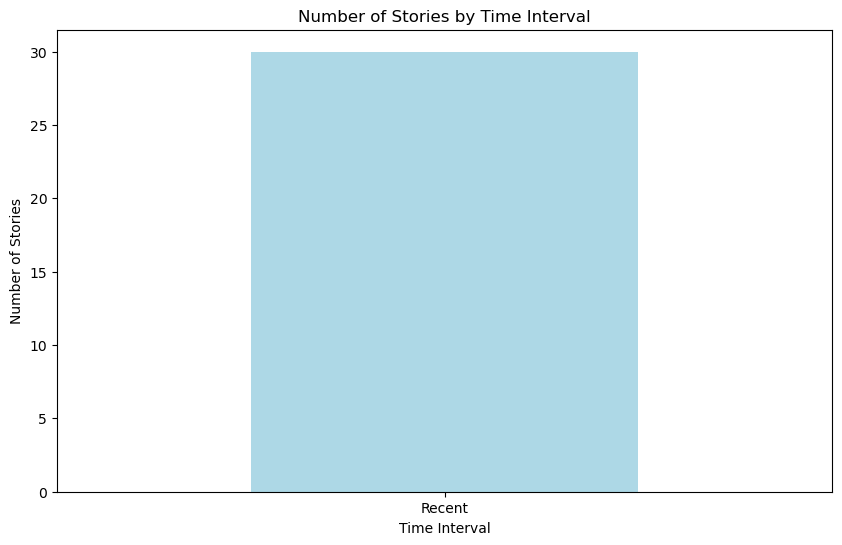

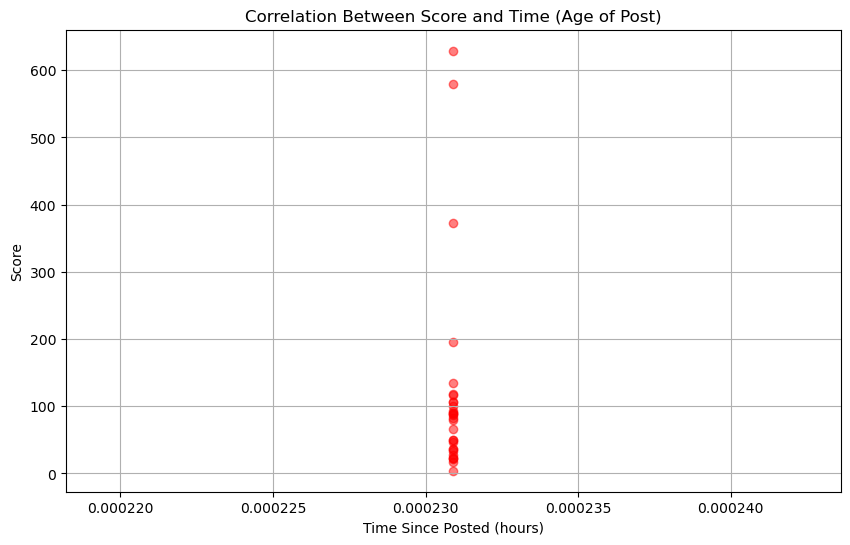

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Load the data from the CSV file
df = pd.read_csv('hacker_news_data.csv')

# Convert the 'Time' column from string to datetime objects
# Assuming 'Time' is in a readable format like 'x minutes ago', 'x hours ago', 'x days ago'
time_deltas = []
for time_str in df['Time']:
    if "minute" in time_str:
        minutes = int(time_str.split()[0])
        time_deltas.append(datetime.datetime.now() - datetime.timedelta(minutes=minutes))
    elif "hour" in time_str:
        hours = int(time_str.split()[0])
        time_deltas.append(datetime.datetime.now() - datetime.timedelta(hours=hours))
    elif "day" in time_str:
        days = int(time_str.split()[0])
        time_deltas.append(datetime.datetime.now() - datetime.timedelta(days=days))
    else:
        time_deltas.append(datetime.datetime.now())

# Add the time deltas as a new column in the dataframe
df['Time'] = time_deltas

# 1. Distribution of Story Scores (Popularity)
plt.figure(figsize=(10, 6))
plt.hist(df['Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Story Scores')
plt.xlabel('Score')
plt.ylabel('Number of Stories')
plt.grid(True)
plt.show()

# 2. Trend of Scores Over Time
df['Time_since_posted'] = (datetime.datetime.now() - df['Time']).dt.total_seconds() / 3600  # Convert to hours

plt.figure(figsize=(10, 6))
plt.scatter(df['Time_since_posted'], df['Score'], alpha=0.7, color='green')
plt.title('Scores Over Time')
plt.xlabel('Time Since Posted (hours)')
plt.ylabel('Score')
plt.grid(True)
plt.show()

# 3. Most Frequent Time Intervals (Day/Hour/Minute)
time_intervals = df['Time_since_posted'].apply(lambda x: 'hourly' if x <= 24 else ('daily' if x <= 48 else 'older'))

plt.figure(figsize=(10, 6))
time_intervals.value_counts().plot(kind='bar', color='orange')
plt.title('Frequency of Posts by Time Interval')
plt.xlabel('Time Interval')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.show()

# 4. Number of Stories Over Time (by Time Interval)
df['Time_interval'] = df['Time_since_posted'].apply(lambda x: 'Recent' if x < 1 else 'Old')

plt.figure(figsize=(10, 6))
df['Time_interval'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Number of Stories by Time Interval')
plt.xlabel('Time Interval')
plt.ylabel('Number of Stories')
plt.xticks(rotation=0)
plt.show()

# 5. Correlation Between Scores and Time (Age of Posts)
plt.figure(figsize=(10, 6))
plt.scatter(df['Time_since_posted'], df['Score'], alpha=0.5, color='red')
plt.title('Correlation Between Score and Time (Age of Post)')
plt.xlabel('Time Since Posted (hours)')
plt.ylabel('Score')
plt.grid(True)
plt.show()